In [ ]:
import numpy as np

susirašome pateiktus duomenis 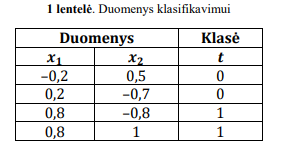

In [ ]:
input = [[-0.2, 0.5, 0],
         [0.2, -0.7, 0],
         [0.8, -0.8, 1],
         [0.8,    1, 1]]

funkcija, kuri sugeneruoja visas galimas svorių kombinacijas (w0, w1, w2), kur w0 yra poslinkis, nuo intervale nuo -10 iki 10 imtinai su žingsniu 1

In [ ]:
def generateWeightsAndBias():
  weights = []

  for i in range(-10, 11):
    for j in range(-10, 11):
      for k in range(-10, 11):
        weights.append([i, j, k])

  return weights

apibrėžta slenkstinė aktyvacijos funkcija su slenksčiu 0

In [ ]:
def threshold(x):
  if x >= 0:
    return 1
  else:
    return 0

apibrėžta sigmoidinė aktyvacijos funkcija, kadangi gražinama reikšmė turi būti 1 arba 0, apskaičiuotą sigmoidinės funkcijos reikšmę turime suapvalinti arba pritaikyti slenkstį


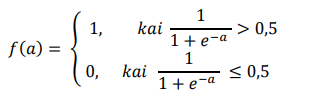

In [ ]:
def sigmoid(x):
  return round(1 / (1 + np.exp(-x)))

apibrėžta funkcija, kuris skaičiuoja įėjimo reikšmių ir svorių sandaugų
sumą, prie kurios dar pridedamas poslinkis
* weights[0] - w0 arba poslinkis
* weights[1] - w1
* weights[2] - w2
* input[0] - x1
* input[1] - x2


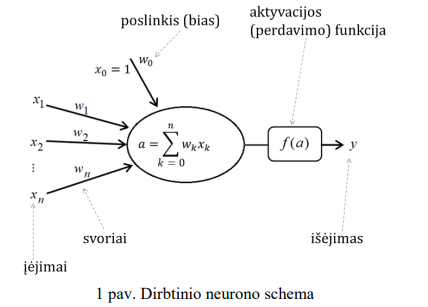


In [ ]:
def calculateX(input, weights):
  return weights[0]+input[0]*weights[1]+input[1]*weights[2]

apibrėžta funkcija, kuri atrenka tinkamus svorius pagal nurodytą aktyvacijos funkciją. Veikimas: ciklo pagalba einama per visas svorių iteracijas, kiekvienai iteracijai sukamas papildomas ciklas, kuris tikrina ar suskaičiuota dirbtinio neurono modelio išeitis atitinka pradiniuose duomenyse pateiktą klasę. Jei visiems duomenims svoriai gražino reikiamą atsakymą (skaičiuojamas count), jie pridedami prie teisingų svorių sąrašo.

In [ ]:
def findWeights(input, weights, activation):
  correctWeights = []
  for weight in weights:
    count = 0
    for i in range(np.shape(input)[0]):
      if activation(calculateX(input[i], weight)) == input[i][2]:
        count = count + 1
    if count == np.shape(input)[0]:
      correctWeights.append(weight)

  return correctWeights

Susigeneruojam visas galimas svorių iteracijas intervale [-10,10], naudodamiesi funkcija findWeights randama tinkamus svorius aktyvacijos funckijoms : slenkstinei, sigmoidinei.

In [ ]:
weights = generateWeightsAndBias()

correctWeightsThreshold = findWeights(input, weights, threshold)
correctWeightsSigmoid = findWeights(input, weights, sigmoid)

In [ ]:
print('Iš', np.shape(generateWeightsAndBias())[0], 'svorių iteracijų tinkamos buvo: ' )
print('   slenkstinei aktyvacijos funkcijai:', np.shape(correctWeightsThreshold)[0])
print('   sigmoidinei aktyvacijos funkcijai:', np.shape(correctWeightsSigmoid)[0])

Iš 9261 svorių iteracijų tinkamos buvo: 
   slenkstinei aktyvacijos funkcijai: 167
   sigmoidinei aktyvacijos funkcijai: 164


In [ ]:
correctWeightsThreshold

In [ ]:
correctWeightsSigmoid

[[-7, 9, 0],
 [-7, 10, 0],
 [-7, 10, 1],
 [-6, 8, 0],
 [-6, 9, -1],
 [-6, 9, 0],
 [-6, 9, 1],
 [-6, 10, -1],
 [-6, 10, 0],
 [-6, 10, 1],
 [-6, 10, 2],
 [-5, 7, 0],
 [-5, 8, -1],
 [-5, 8, 0],
 [-5, 8, 1],
 [-5, 9, -2],
 [-5, 9, -1],
 [-5, 9, 0],
 [-5, 9, 1],
 [-5, 9, 2],
 [-5, 10, -2],
 [-5, 10, -1],
 [-5, 10, 0],
 [-5, 10, 1],
 [-5, 10, 2],
 [-5, 10, 3],
 [-4, 6, 0],
 [-4, 6, 1],
 [-4, 7, -1],
 [-4, 7, 0],
 [-4, 7, 1],
 [-4, 7, 2],
 [-4, 8, -2],
 [-4, 8, -1],
 [-4, 8, 0],
 [-4, 8, 1],
 [-4, 8, 2],
 [-4, 9, -3],
 [-4, 9, -2],
 [-4, 9, -1],
 [-4, 9, 0],
 [-4, 9, 1],
 [-4, 9, 2],
 [-4, 9, 3],
 [-4, 10, -2],
 [-4, 10, -1],
 [-4, 10, 0],
 [-4, 10, 1],
 [-4, 10, 2],
 [-4, 10, 3],
 [-4, 10, 4],
 [-3, 4, 0],
 [-3, 5, 0],
 [-3, 5, 1],
 [-3, 6, -1],
 [-3, 6, 0],
 [-3, 6, 1],
 [-3, 6, 2],
 [-3, 7, -2],
 [-3, 7, -1],
 [-3, 7, 0],
 [-3, 7, 1],
 [-3, 7, 2],
 [-3, 7, 3],
 [-3, 8, -2],
 [-3, 8, -1],
 [-3, 8, 0],
 [-3, 8, 1],
 [-3, 8, 2],
 [-3, 8, 3],
 [-3, 8, 4],
 [-3, 9, -1],
 [-3, 9, 0],
 [-3, 9, 1]

In [ ]:
# pasitikrinimui
#
#

weights = generateWeightsAndBias()
activation = sigmoid
T = 0
correctWeights = []

for weight in weights:
  w0, w1, w2 = weight

  a1 = w0 + w1 * -0.2 + w2 * 0.5
  a2 = w0 + w1 * 0.2 + w2 * -0.7
  a3 = w0 + w1 * 0.8 + w2 * -0.8
  a4 = w0 + w1 * 0.8 + w2 * 1

  if activation(a1) == 0 and activation(a2) == 0 and activation(a3) == 1 and activation(a4) == 1 :
    correctWeights.append(weight)
    # print(w0, w1, w2)

In [ ]:
np.shape(correctWeights)

(164, 3)